# Movie Rating Prediction (Codsoft)

Importing the necessary dependencies

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset from Google Drive

In [310]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Load the dataset

In [311]:
path = '/content/drive/MyDrive/CodSoft/IMDb Movies India.csv'
data = pd.read_csv(path , encoding='latin-1')

Exploring the data


Display the first few rows of the dataset

In [312]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [313]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


Display concise summary of the dataset

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Display the shape of the dataset

In [315]:
data.shape

(15509, 10)

Display the size of the dataset

In [316]:
data.size

155090

Cheking the Statistical informstion of the data

In [317]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Data Cleaning

Checking for null/missing values in the dataset

In [318]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [319]:
data.isnull().sum().sum()

33523

Drop missing values

In [320]:
data.dropna(inplace=True)

In [321]:
data.isnull().sum().sum()

0

Dimensions after removing missing values:

In [322]:
data.shape

(5659, 10)

Checking for duplicate values in the dataset

In [323]:
data.duplicated().sum()

0

cleaning the year column

In [324]:
data['Year']=data['Year'].str.extract(r'([0-9].{0,3})',expand=False)

Cleaning the duration column

In [325]:
data['Duration'] = data['Duration'].str.extract(r'([0-9]+)', expand=False)

### Convert columns to numeric types

In [326]:
data['Duration']=pd.to_numeric(data['Duration'])
data['Year']=pd.to_numeric(data['Year'])

In [327]:
data['Votes']=data['Votes'].str.extract(r'([0-9]+)',expand=False)
data['Votes']=pd.to_numeric(data['Votes'])

Column types after conversion:

In [328]:
data.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


Exploratory Data Analysis (EDA)

Number of movies per year

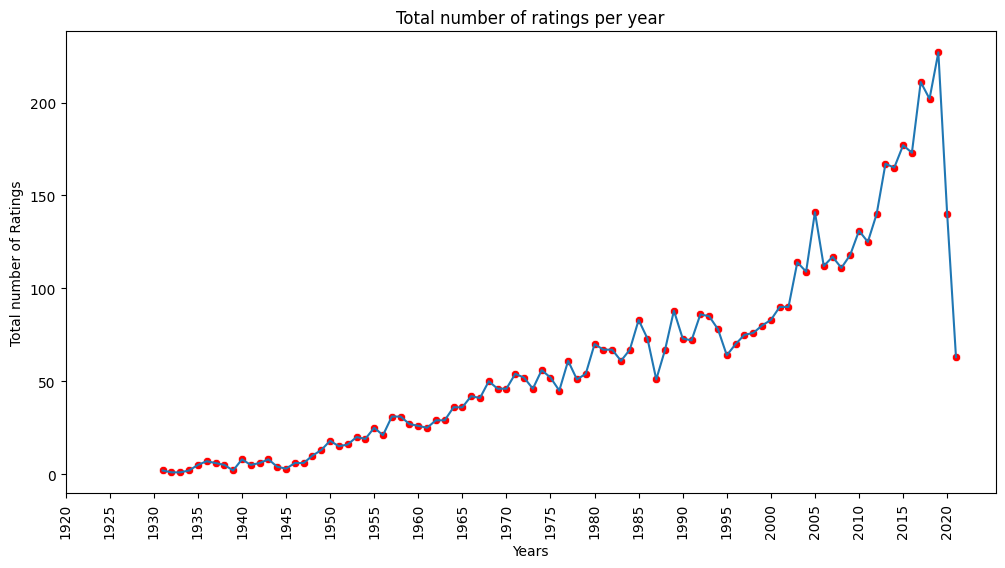

In [329]:
rating_sum = data.groupby('Year')['Rating'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Total number of Ratings')
plt.xlabel('Years')
plt.title('Total number of ratings per year')
plt.xticks(rotation=90)
plt.show()

Average rating per year

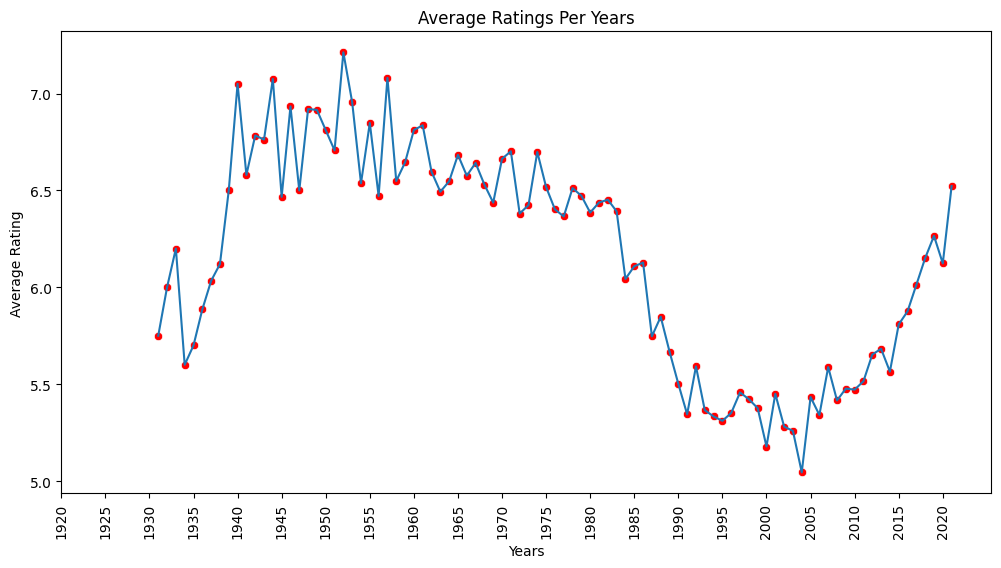

In [330]:
rating_avg = data.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Rating')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.show()

Top 20 Directors by Frequency of Movies

<ipython-input-331-f6004f47de85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_directors.index,x=top_20_directors.values,orient='h',palette='viridis')


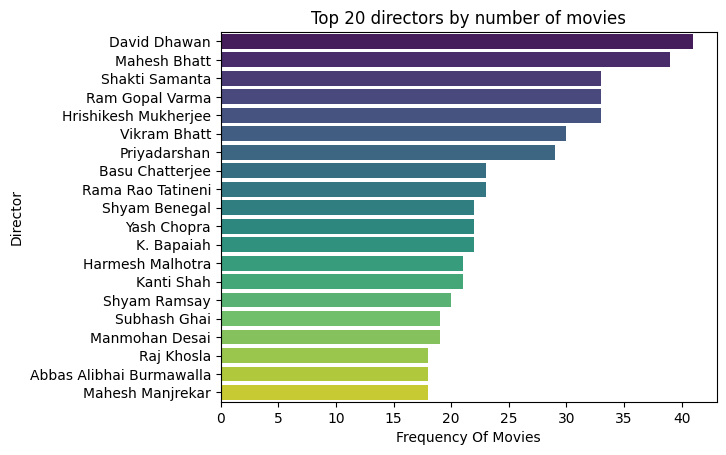

In [331]:
top_20_directors = data.groupby('Director')['Name'].count().sort_values(ascending=False).head(20)

sns.barplot(y=top_20_directors.index,x=top_20_directors.values,orient='h',palette='viridis')
plt.xlabel('Frequency Of Movies')
plt.ylabel('Director')
plt.title('Top 20 directors by number of movies')
plt.show()

Impact of movie duration on ratings :

Correlation between duration and rating 0.0018393493773531857


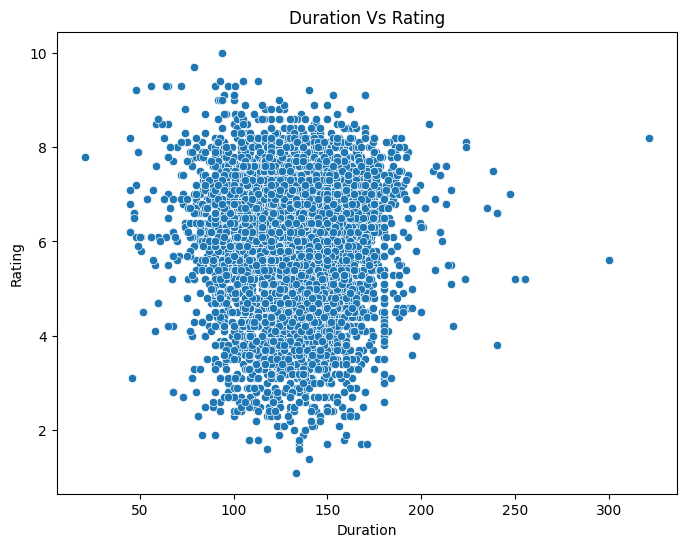

In [332]:

corr_leng_rat=data['Duration'].corr(data['Rating'])
print(f"Correlation between duration and rating {corr_leng_rat}")


plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=data)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.show()

In [333]:
# No meaningful relationship between movie duration and rating.

### Top 10 movies by rating

In [334]:
overall= data.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 highest-rated movies:")
overall

Top 10 highest-rated movies:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


<ipython-input-335-8dfd13c9a3d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='viridis')


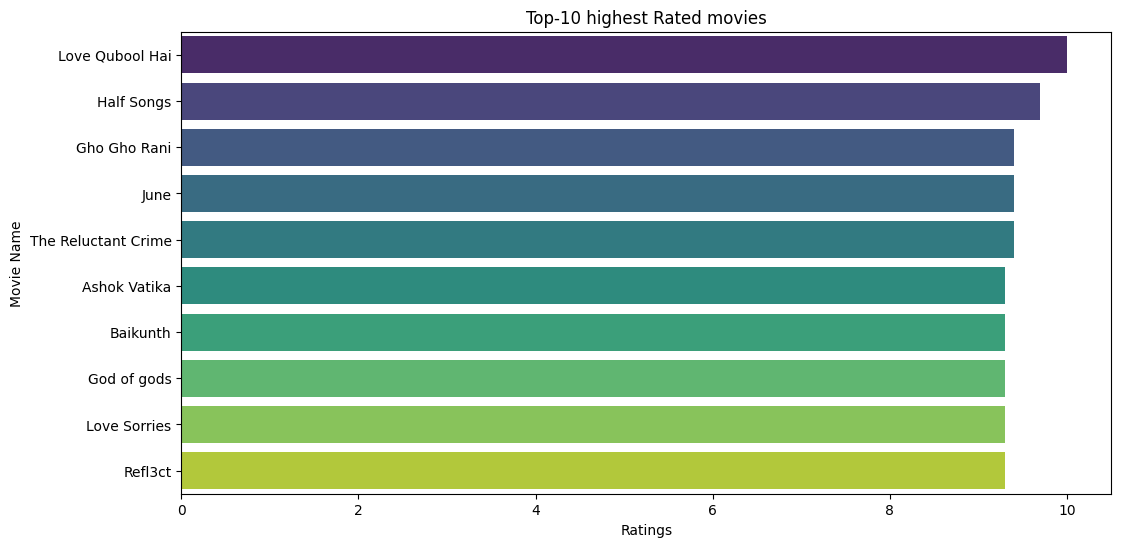

In [335]:
plt.figure(figsize=(12,6))
sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='viridis')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Movie Name')
plt.xlabel('Ratings')
plt.show()

### Top 10 movies by year

In [336]:

for year in data['Year'].unique():
    year_df = data[data['Year'] == year]
    top_10_year = year_df.nlargest(10, 'Rating').sort_values(by='Rating', ascending=False)
    print(f"\nTop-10 movies of the year {year}:")
    print(top_10_year)
    print('\n')


Top-10 movies of the year 2019:
                                                    Name  Year  Duration  \
5077                                        Gho Gho Rani  2019       105   
5125                                         God of gods  2019        90   
13231                                         Sindhustan  2019        64   
10210                              Nirmal Anand Ki Puppy  2019       100   
6811                               Josef - Born in Grace  2019       100   
3802                                             Dhuusar  2019       106   
1709                                    Bahattar Hoorain  2019       120   
8157   Last Chance: The Moment I Finally Embraced the...  2019        74   
14198                                  The Pickup Artist  2019       111   
8238                                         Little Baby  2019       105   

                              Genre  Rating  Votes  \
5077               History, Romance     9.4     47   
5125                  

### Most Popular Genres of movies

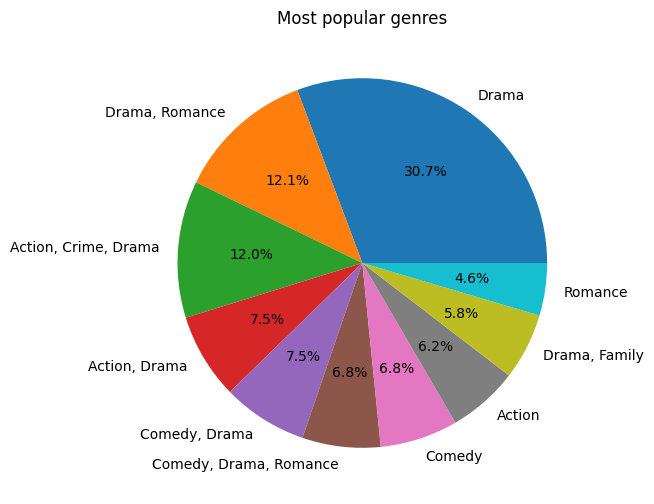

In [337]:
plt.figure(figsize=(12,6))
data['Genre'].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("")
plt.title('Most popular genres')
plt.show()

### Distribution of movie rating

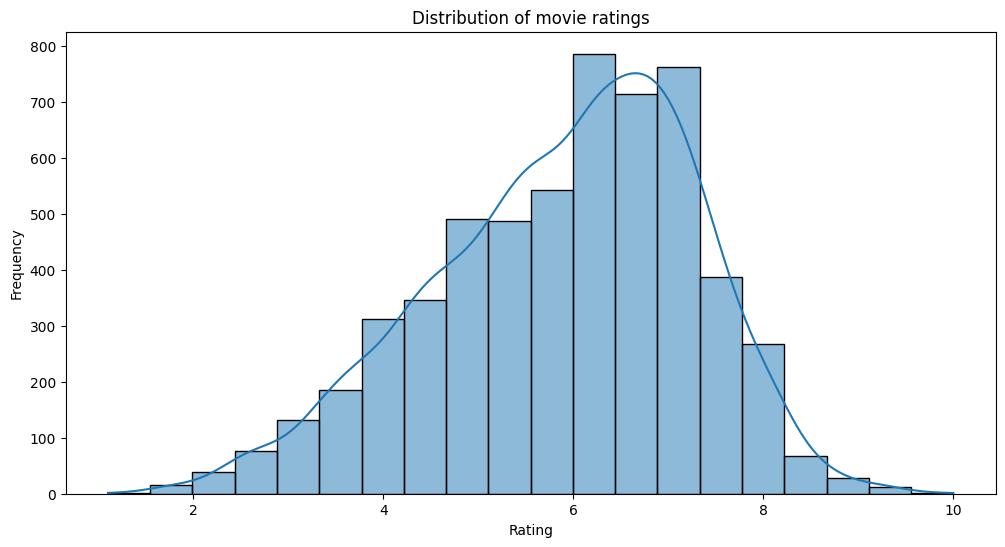

In [338]:
plt.figure(figsize=(12,6))
sns.histplot(data['Rating'],bins=20,kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of movie ratings")
plt.show()

###  Actors with the most movies

In [339]:

actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).dropna().value_counts().reset_index()
# Rename the columns to 'Name' and 'no_of_movies'
actors = actors.rename(columns={'index': 'Name', 'count': 'no_of_movies'})

<ipython-input-340-6a7ca3fe5776>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=actors['Name'].head(10),x=actors['no_of_movies'].head(10),orient='horizontal',palette='viridis')


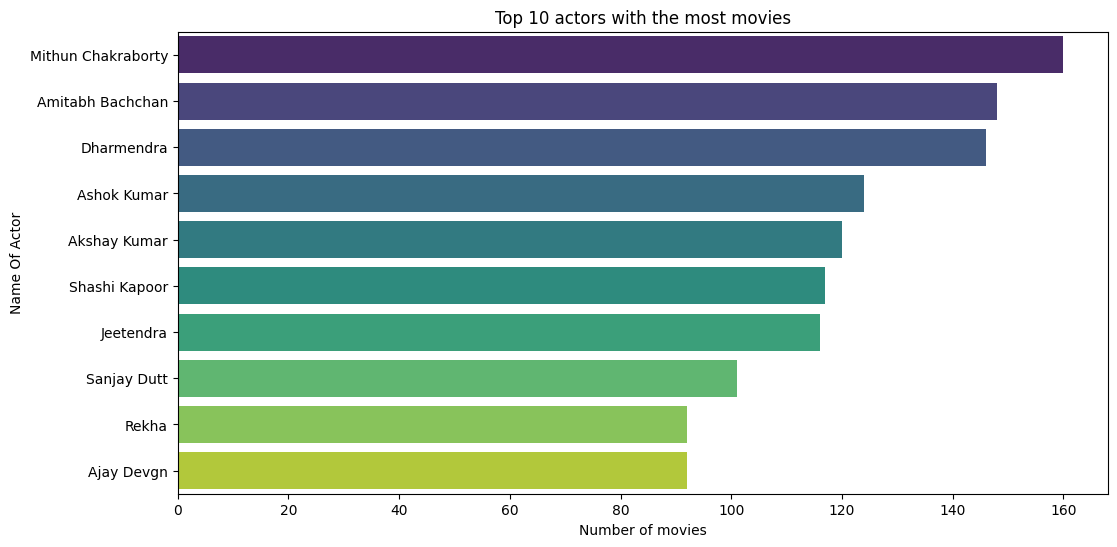

In [340]:
plt.figure(figsize=(12,6))
sns.barplot(y=actors['Name'].head(10),x=actors['no_of_movies'].head(10),orient='horizontal',palette='viridis')
plt.title("Top 10 actors with the most movies")
plt.ylabel('Name Of Actor')
plt.xlabel('Number of movies')
plt.show()

### Outlier detection with boxplots

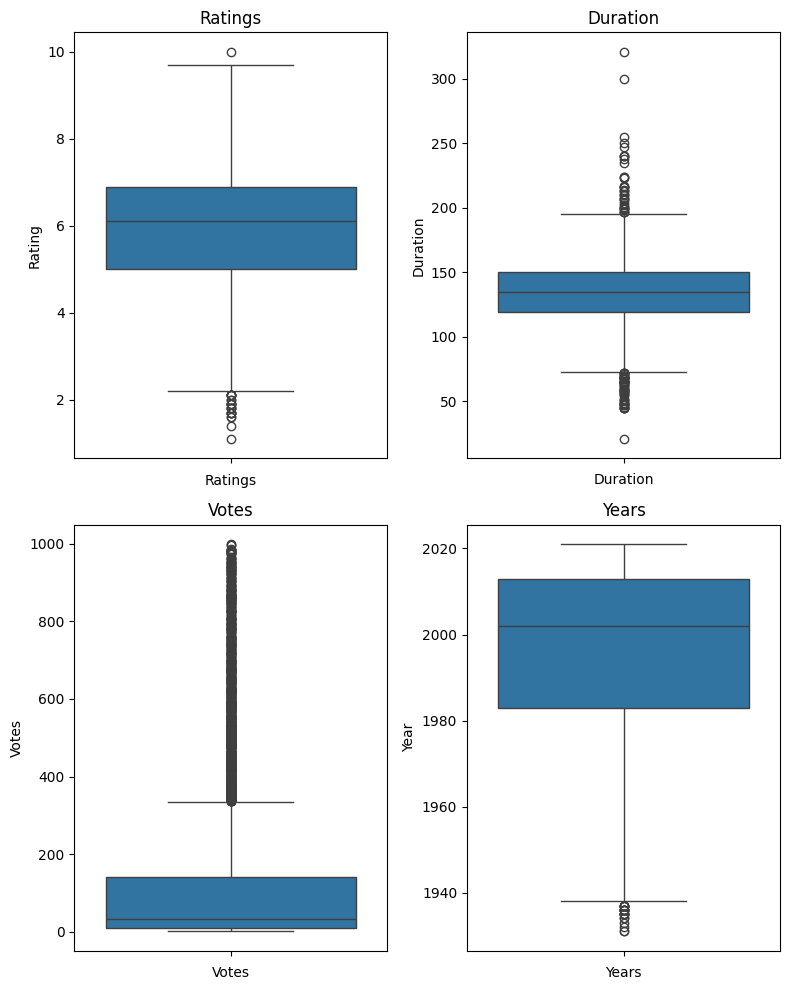

In [341]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))

sns.boxplot(data=data,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=data,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=data,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=data,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

### Outlier treatment

In [342]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [343]:

data=remove_outliers(data,'Rating')
data=remove_outliers(data,'Duration')
data=remove_outliers(data,'Votes')
data=remove_outliers(data,'Year')

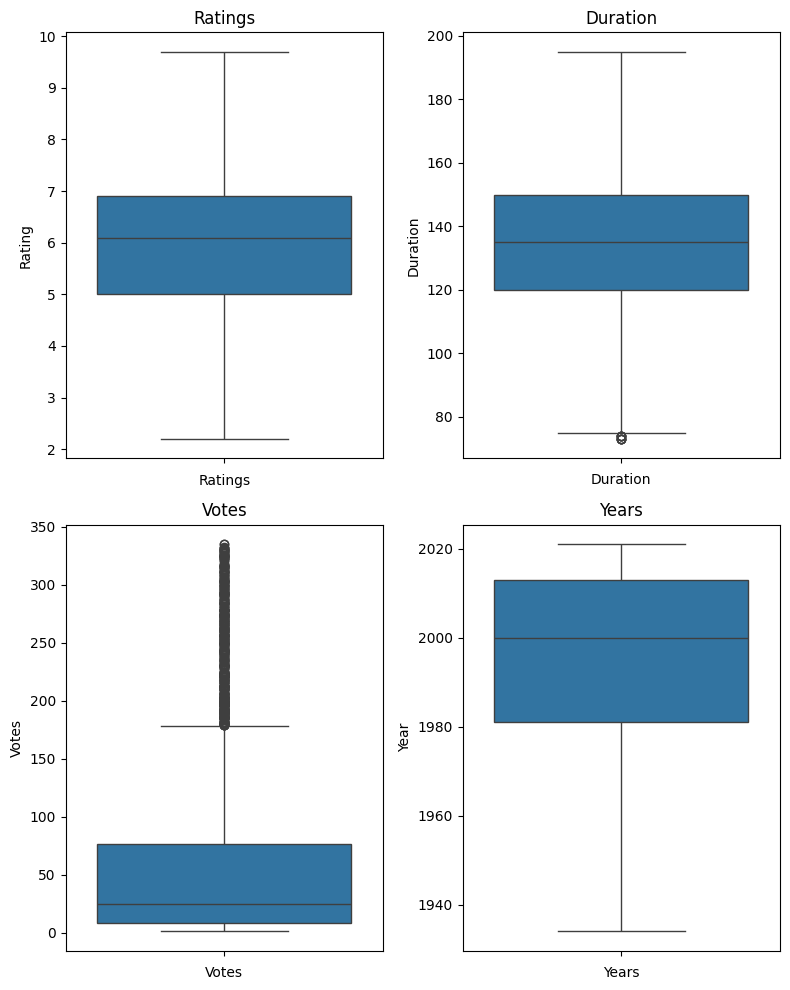

In [344]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))

sns.boxplot(data=data,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=data,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=data,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=data,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

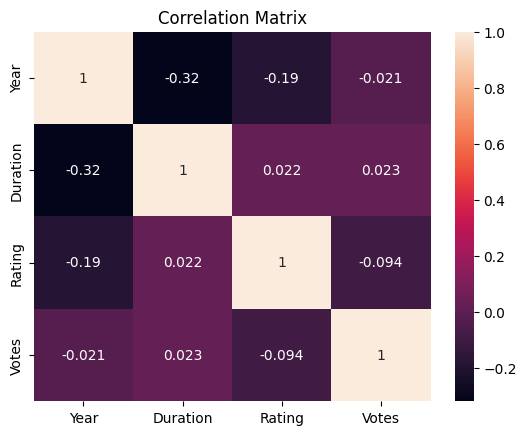

In [345]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [346]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error


Dropping the name column as it does not impact the outcome

In [347]:

data.drop('Name',axis=1,inplace=True)

Grouping the columns with their average rating and then creating a new feature

In [348]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

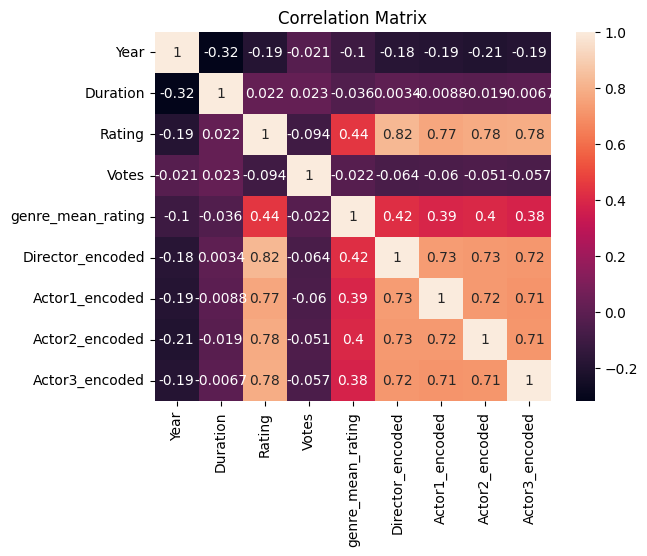

In [349]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [350]:

## Keeping predictor and target variables

x = data[['Year', 'Duration', 'Votes', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']

Split the dataset into training and testing sets

In [351]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


### Model building

Linear regression

In [352]:
## Building model and training

model = LinearRegression()
model.fit(x_train,y_train)
model_pred = model.predict(x_test)

In [353]:

## Evaluating the performance of the model

print("Linear Regression Model Evaluation:\n")
print(f"Mean Squared Error: {mean_squared_error(y_test, model_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, model_pred):.4f}")
print(f"R-squared Score: {r2_score(y_test, model_pred):.4f}")

Linear Regression Model Evaluation:

Mean Squared Error: 0.3529
Mean Absolute Error: 0.4431
R-squared Score: 0.7964
